In [258]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing, decomposition

In [203]:
df = pd.read_csv('Train.csv')
print(df)

          ID  Gender Ever_Married  Age Graduated     Profession  \
0     462809    Male           No   22        No     Healthcare   
1     462643  Female          Yes   38       Yes       Engineer   
2     466315  Female          Yes   67       Yes       Engineer   
3     461735    Male          Yes   67       Yes         Lawyer   
4     462669  Female          Yes   40       Yes  Entertainment   
...      ...     ...          ...  ...       ...            ...   
8063  464018    Male           No   22        No            NaN   
8064  464685    Male           No   35        No      Executive   
8065  465406  Female           No   33       Yes     Healthcare   
8066  467299  Female           No   27       Yes     Healthcare   
8067  461879    Male          Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                 1.0            Low          4.0  Cat_4            D  
1                 NaN        Average          3.0  

In [204]:
# 전체 data 개수 대비 NaN의 비율

(df.isnull().sum() / len(df)) * 100

ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64

In [205]:
for i in ['Gender' , 'Ever_Married' , 'Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1'  ]:
    print(f"Column {i} unique values {df[i].unique()}")

Column Gender unique values ['Male' 'Female']
Column Ever_Married unique values ['No' 'Yes' nan]
Column Age unique values [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Column Graduated unique values ['No' 'Yes' nan]
Column Profession unique values ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Column Work_Experience unique values [ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Column Spending_Score unique values ['Low' 'Average' 'High']
Column Family_Size unique values [ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
Column Var_1 unique values ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']


In [206]:
# replace blank values with mode 
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [212]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Gender','Ever_Married','Graduated','Age','Profession','Work_Experience','Spending_Score','Family_Size','Var_1','Segmentation'])

df = encoder.fit_transform(df)

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,1,1,1,1,1,1,1,1,1
1,462643,2,2,2,2,2,1,2,2,1,2
2,466315,2,2,3,2,2,1,1,3,2,3
3,461735,1,2,3,2,3,2,3,4,2,3
4,462669,2,2,4,2,4,1,3,5,2,2


In [213]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
columns_to_normalize = ['Age','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [214]:
# Declare feature vector and target variable
X = df.drop(['ID','Segmentation'], axis=1)

y = df['Segmentation']

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# check the shape of X and Y
X_train.shape, X_test.shape

X_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
5015,1,2,0.242424,2,0.375,0.000000,0.0,0.375,0.166667
5755,1,2,0.954545,2,0.250,0.071429,1.0,0.375,0.166667
7781,2,1,0.363636,2,0.000,0.571429,0.0,0.125,0.166667
4518,2,2,0.515152,2,0.875,0.000000,0.0,0.250,0.500000
6195,1,1,0.151515,1,0.000,0.000000,0.0,0.500,0.000000


In [215]:
X_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
742,1,1,0.363636,2,0.375,0.000000,0.0,0.125,0.000000
2127,2,2,0.393939,2,0.375,0.071429,0.5,0.375,0.166667
2107,1,1,0.787879,2,0.000,0.142857,0.0,0.625,0.833333
2943,1,2,0.530303,2,0.375,0.000000,0.5,0.000,0.166667
4362,2,1,0.151515,1,0.375,0.000000,0.0,0.625,0.166667


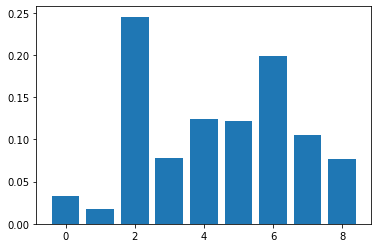

In [219]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Decision Tree

In [240]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=4)


# fit the model
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4948


In [241]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([2, 4, 1, ..., 2, 3, 1])

In [242]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.5104


In [244]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [245]:
y_pred_en = clf_en.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

y_pred_train_en = clf_en.predict(X_train)

print(y_pred_train_en)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.4866
[2 2 1 ... 2 3 1]
Training-set accuracy score: 0.5116


In [246]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.5116
Test set score: 0.4866


In [247]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       0.61      0.68      0.64       692
           2       0.40      0.35      0.37       597
           3       0.36      0.41      0.38       552
           4       0.56      0.47      0.51       580

    accuracy                           0.49      2421
   macro avg       0.48      0.48      0.48      2421
weighted avg       0.49      0.49      0.48      2421



## K-means

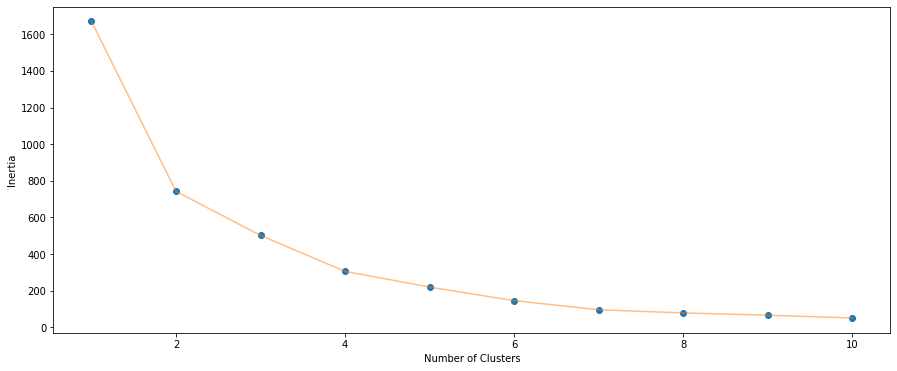

In [248]:
from sklearn.cluster import KMeans
import warnings
import os
import numpy as np
import matplotlib.pyplot as plt 
import plotly as py
warnings.filterwarnings("ignore")

'''Age and spending Score'''
X1 = df[['Age' , 'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

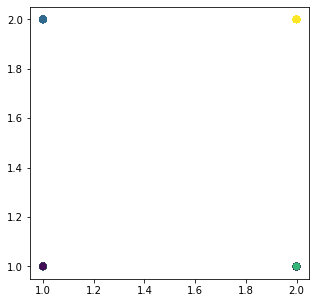

In [252]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_train.drop(columns=["Gender","Spending_Score"]))
    wcss.append(kmeans.inertia_)

f, ax  = plt.subplots(figsize = (5,5))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=0)
y_kmeans_train = kmeansmodel.fit_predict(X_train)

plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_kmeans_train, alpha=0.7, s=40)

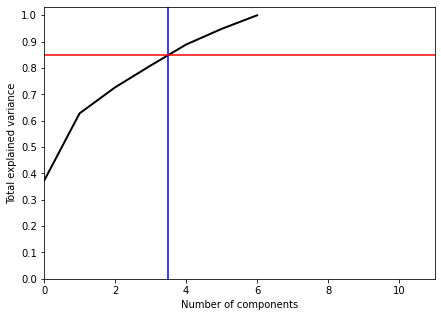

In [268]:
pca = PCA().fit(X_train.drop(columns=["Gender","Spending_Score"]))

plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 11)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(3.5, c='b')
plt.axhline(0.85, c='r')
plt.show();

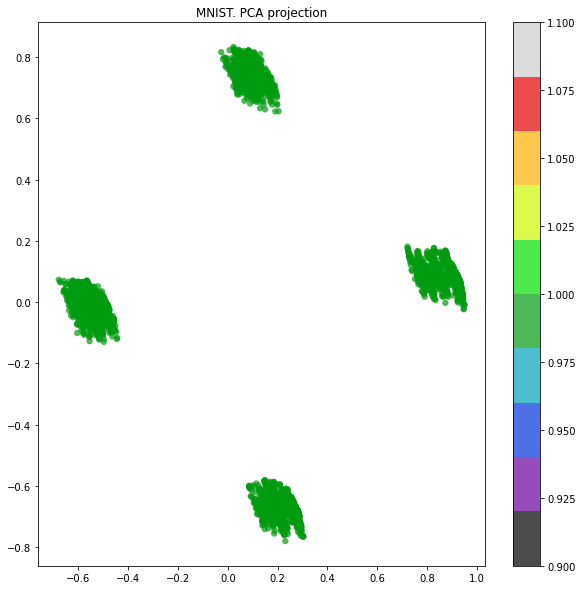

In [263]:
pca = decomposition.PCA(n_components=2)
X_reduced_train = pca.fit_transform(X_train.drop(columns=["Gender","Spending_Score"]))

plt.figure(figsize=(10,10))
plt.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1], c=[1]*X_train.shape[0], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

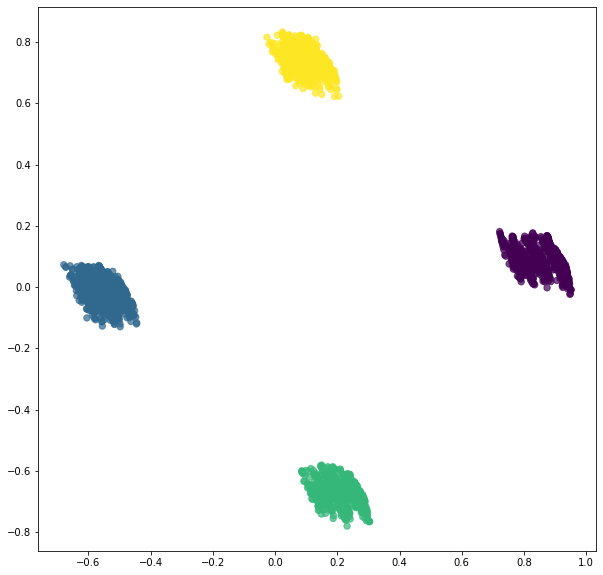

In [266]:
f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=0)
y_kmeans_train = kmeansmodel.fit_predict(X_reduced_train)

plt.scatter(X_reduced_train[:,0], X_reduced_train[:,1], c=y_kmeans_train, alpha=0.7, s=40)